## 8. 화면을 분할하여 여러 그래프를 그리기

https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

In [1]:
#필요한 패키지를 import
import matplotlib.pyplot as plt

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

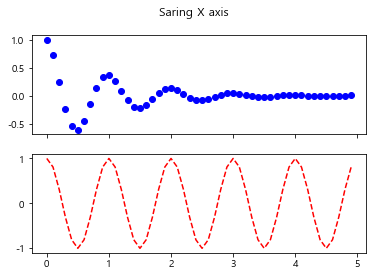

In [30]:
import numpy as np 

def f_graph(t):
    return np.exp(-t) * np.cos(2 *np.pi*t) #Pi * 2 너비에 * t 곱해서 

x = np.arange(0.0, 5.0, 0.1)
f,axarr = plt.subplots(2, sharex=True) # 두 개 row 로 된 subplot을 생성 
# shareX, shareY는 각각 x축 혹은 y축을 공유할 지 여부

# f는 전체 그림판, axarr은 나누어진 두 개의 subplot을 array로 반환, 즉 2개의 그래프가 들어가는 figure 생성 
f.suptitle('Saring X axis')

axarr[0].plot(x, f_graph(x), 'bo')#첫째 subplot에 그림을 그림
axarr[1].plot(x, np.cos(2*np.pi*x),'r--')#둘째 subplot에 그림을 그림
plt.show()

2X2 타일로 그래프 네 개를 그리고 싶다면?

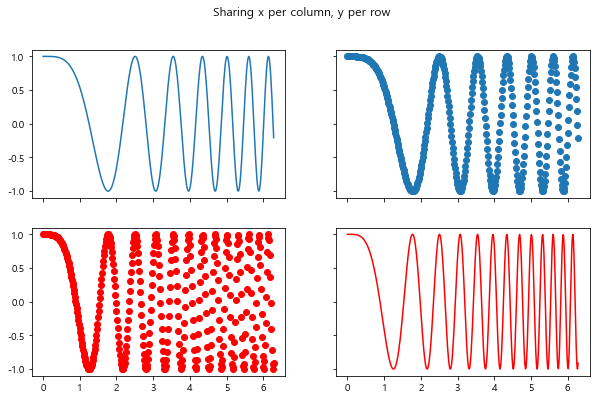

In [37]:
x = np.linspace(0, 2 * np.pi, 400)  #주어진 범위(0~2*np.pi) 사이에 400개의 등간격 숫자를 생성
y = np.cos(x ** 2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,6))
# 2x2의 subplot 생성, figsize 로 각 subplot의 크기를 지정 
f.suptitle('Sharing x per column, y per row')

axarr[0,0].plot(x,y)
axarr[0,1].scatter(x,y)
axarr[1,0].scatter(x, 2 * y ** 2 - 1, color='r')
axarr[1,1].plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

subplot을 그리는 다른 방법

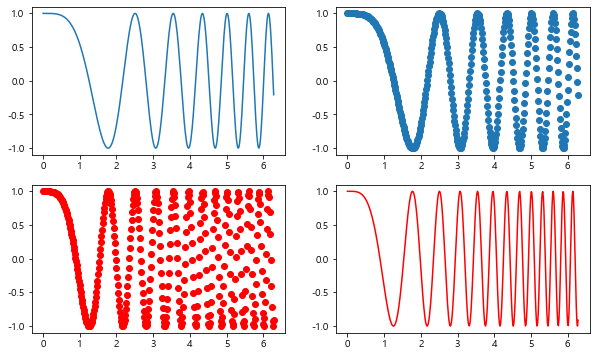

In [38]:
f = plt.figure(figsize =(10, 6)) #전체 그림판 설정 및 그래프 크기 설정 

plt.subplot(2,2,1) #rows = 2, columns = 2로 나눈 것 중에서 첫째 subplot을 지정
plt.plot(x,y)

plt.subplot(2,2,2)
plt.scatter(x, y)

plt.subplot(2,2,3)
plt.scatter(x, 2 * y ** 2 - 1, color='r')

plt.subplot(2,2,4)
plt.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

그림을 pdf로 저장하기

In [40]:
f.savefig("foo,pdf", bbox_inches='tight')

## 9. Kernel Density Estimation

Kernel Density Estimation은 각 값에 대해 어느 정도의 확률이 있는 지를 함수 혹은 그래프로 표현하고자 하는 것을 말한다.  
히스토그램은 주어진 값들을 이용하여 그 변수의 분포에 대한 대략적인 모양을 알려주는데, 불연속적이라든지 각 막대 크기에 따라 모양이 달라지는 등 문제가 있다.  
KDE는 이를 보완 하기 위해 히스토그램을 부드럽게 smoothing한 형태 라고 이해할 수 있다.

In [42]:
# 필요한 데이터를 load, 여기서는 데이터의 내용은 중요하지 않음
from sklearn.datasets import load_breast_cancer
#사이킷런에서 유방함 데이터를 로드 
cancer = load_breast_cancer()
X, Y = cancer.data[:, 0], cancer.target

In [43]:
X[:30]#대응하는 Y가 0인 그룹과 1인 그룹으로 나뉨

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 ])

In [44]:
Y[:30]#X에 대응하는 Y값 확인, 이 값에 따라 X를 두 그룹으로 나눌 수 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

먼저 scatter를 이용해 두 그룹의 모양을 살펴보고자 함

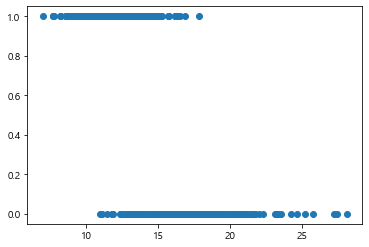

In [45]:
plt.scatter(X, Y)
plt.show()

위 그래프의 문제는 두 그룹의 점들이 겹쳐서 그려져 있어서 각 그룹의 분포를 알기 어렵다는 문제가 있다. 이와 같은 문제는 히스토그램을 그려서 해결이 가능하다.  
히스토그램은 X값의 bin 별로 빈도를 보여주므로 어느값 근처에 몰려있는지 파악하기 쉽다.  

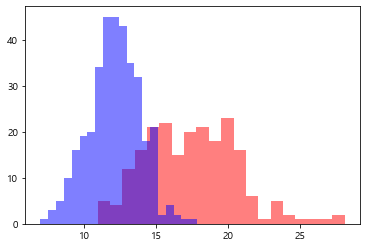

In [53]:
X0 = X[Y==0] #Y가 0인 값을 분리
X1 = X[Y==1] # Y가 1인 값을 분리 

plt.hist(X0, bins=20, color='red', alpha= .5)
plt.hist(X1, bins=20, color='blue', alpha= .5)
plt.show()

히스토그램은 불연속적 경계와 적절한 bin의 수를 잘 선택해야하는 등의 문제가 있으므로 KDE를 통해 연속적인 그래프를 그리면 보기가 더 편하다. 

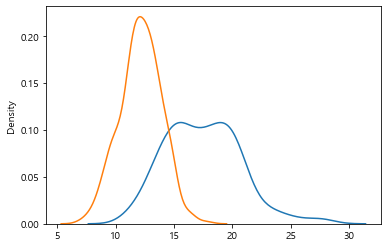

In [55]:
import seaborn as sns
#sns.set_style('whitegrid')
g = sns.kdeplot(X0)
g = sns.kdeplot(X1)